In [1]:
from bpd.io import load_dataset
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = ""
os.environ["JAX_PLATFORMS"] = "cpu"
os.environ["JAX_ENABLE_X64"] = "True"


# Prelim

In [3]:
fpath = "/pscratch/sd/i/imendoza/data/cache_chains/exp70_44/interim_samples_441_plus.npz"

In [4]:
ds = load_dataset(fpath)

In [5]:
ds.keys()

dict_keys(['hyper', 'samples', 'truth'])

In [6]:
ds['samples'].keys()

dict_keys(['e2', 'e1'])

In [7]:
ds['samples']['e1'].shape

(60000, 300)

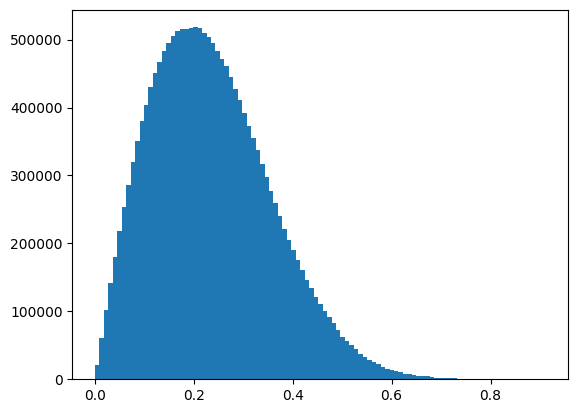

In [15]:
e_mag = np.sqrt(ds['samples']['e1'].ravel()**2 + ds['samples']['e2'].ravel()**2 )
plt.hist(e_mag, bins=101);

(array([1.0088e+04, 8.5030e+03, 5.8740e+03, 3.2860e+03, 1.5110e+03,
        5.2000e+02, 1.7100e+02, 3.8000e+01, 8.0000e+00, 1.0000e+00]),
 array([2.45007585, 2.63570035, 2.82132486, 3.00694937, 3.19257388,
        3.37819839, 3.56382289, 3.7494474 , 3.93507191, 4.12069642,
        4.30632093]),
 <BarContainer object of 10 artists>)

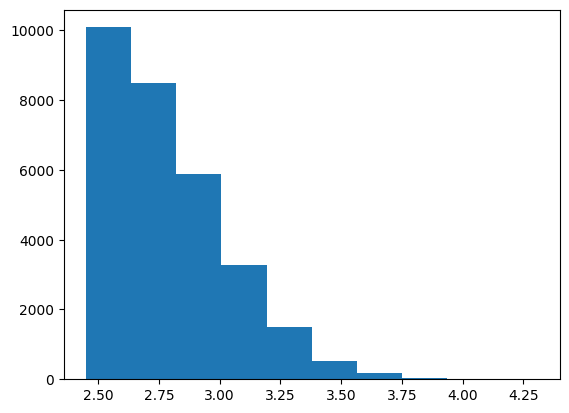

In [38]:
plt.hist(ds['truth']['lf'])

np.float64(-0.21584379367701137)

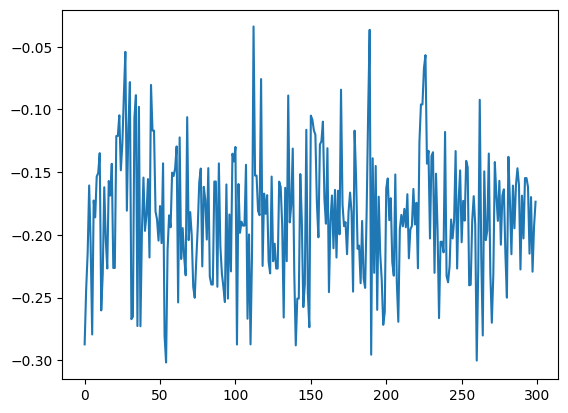

In [39]:
plt.plot(ds['samples']['e1'][5, :])
ds['truth']['e1'][5]

np.float64(-0.008703931334313514)

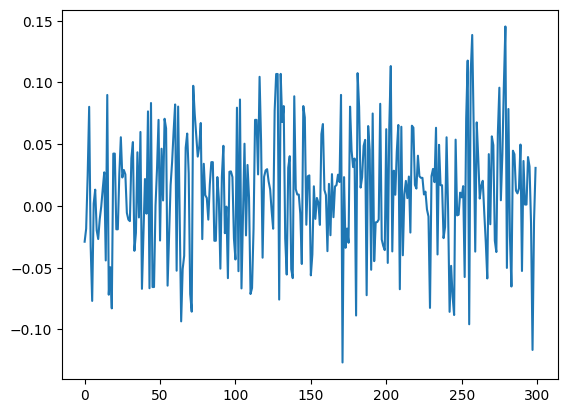

In [41]:
plt.plot(ds['samples']['e2'][5, :])
ds['truth']['e2'][5]

# jackknife smaller sample size 

In [29]:
from bpd.io import load_dataset
import numpy as np

In [30]:
fpath = "/pscratch/sd/i/imendoza/data/cache_chains/exp70_42/tmp2/g_samples_jack_42.npz"

In [31]:
ds = load_dataset(fpath)
ds.keys()

dict_keys(['g_minus', 'g_plus'])

In [32]:
gp = ds['g_plus']
gm = ds['g_minus']

In [33]:
gp.shape, gm.shape

((200, 1000, 2), (200, 1000, 2))

In [34]:
g1 = 0.02

In [35]:
m_jack = (
    gp[..., 0].mean(axis=1) - gm[..., 0].mean(axis=1)
) / 2 / g1 - 1

In [51]:
m_jack.mean()

np.float64(-0.033318830183836856)

In [36]:
np.sqrt(m_jack.var() * (200 - 1))

np.float64(0.014454863256821413)

# Jackknife

In [1]:
from bpd.io import load_dataset
import numpy as np

In [2]:
fpath = "/pscratch/sd/i/imendoza/data/cache_chains/exp70_42/g_samples_jack_42.npz"

In [3]:
ds = load_dataset(fpath)


In [4]:
ds.keys()

dict_keys(['g_plus', 'g_minus'])

In [5]:
gp = ds['g_plus']
gm = ds['g_minus']

In [6]:
gp.shape, gm.shape

((500, 1000, 2), (500, 1000, 2))

In [7]:
g1 = 0.02

In [13]:
m_jack = (
    gp[..., 0].mean(axis=1) - gm[..., 0].mean(axis=1)
) / 2 / g1 - 1

In [14]:
m_jack.shape

(500,)

(array([  4.,   2.,  17.,  81., 177., 165.,  38.,  14.,   0.,   2.]),
 array([-0.03721941, -0.03641334, -0.03560727, -0.0348012 , -0.03399513,
        -0.03318906, -0.03238299, -0.03157693, -0.03077086, -0.02996479,
        -0.02915872]),
 <BarContainer object of 10 artists>)

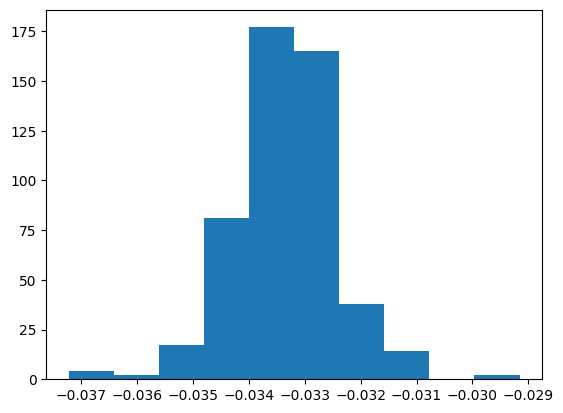

In [15]:
plt.hist(m_jack)

In [16]:
m_jack.mean()

np.float64(-0.033318830183836856)

In [17]:
m_jack.std()

np.float64(0.0009106064219242204)

In [18]:
m_jack.shape

(500,)

In [19]:
m_jack_std = np.sqrt(m_jack.var() * (500 - 1))
m_jack_std

np.float64(0.020341406632019478)

In [20]:
m_jack.var()

np.float64(8.292040556496312e-07)

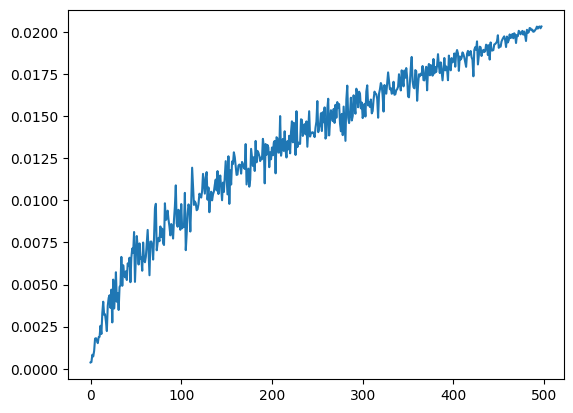

In [21]:
# does it make sense to jackknife like this over subset (not include all galaxies??) 
stds = []
for ii in range(2, 500):
    indices = np.random.choice(np.arange(500), size=(ii,), replace=False)
    stds.append( np.sqrt( m_jack[indices].var() * (ii-1) ) )
stds = np.array(stds)
plt.plot(stds)

In [22]:
m_jack.shape

(500,)

## Bootstraps

In [23]:
from bpd.io import load_dataset
import numpy as np
import matplotlib.pyplot as plt 

In [24]:
fpath = "/pscratch/sd/i/imendoza/data/cache_chains/exp70_42/tmp3/g_samples_boots_42.npz"

In [25]:
ds = load_dataset(fpath)

In [26]:
ds.keys()

dict_keys(['g_minus', 'g_plus'])

In [27]:
gp = ds['g_plus']
gm = ds['g_minus']

In [28]:
gp.shape, gm.shape

((1000, 1000, 2), (1000, 1000, 2))

In [29]:
gp.mean(axis=1)[:, 0].mean()

np.float64(0.019578777987706186)

In [30]:
g1 = 0.02

In [31]:
mboot = (
    gp[..., 0].mean(axis=1) - gm[..., 0].mean(axis=1)
) / 2 / g1 - 1

(array([ 1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  4.,  1.,  3., 13.,  9.,
        11., 19., 23., 45., 41., 50., 64., 81., 94., 79., 88., 75., 60.,
        66., 51., 36., 33., 16., 11.,  5.,  5.,  8.,  2.,  3.,  0.,  0.,
         1.,  1.]),
 array([-0.03943391, -0.0391586 , -0.03888328, -0.03860797, -0.03833265,
        -0.03805734, -0.03778202, -0.03750671, -0.03723139, -0.03695608,
        -0.03668076, -0.03640545, -0.03613013, -0.03585482, -0.0355795 ,
        -0.03530419, -0.03502887, -0.03475356, -0.03447824, -0.03420293,
        -0.03392761, -0.0336523 , -0.03337698, -0.03310167, -0.03282635,
        -0.03255104, -0.03227572, -0.03200041, -0.03172509, -0.03144978,
        -0.03117446, -0.03089915, -0.03062383, -0.03034852, -0.0300732 ,
        -0.02979789, -0.02952257, -0.02924726, -0.02897194, -0.02869663,
        -0.02842131, -0.028146  ]),
 [<matplotlib.patches.Polygon at 0x7fb2c330b830>])

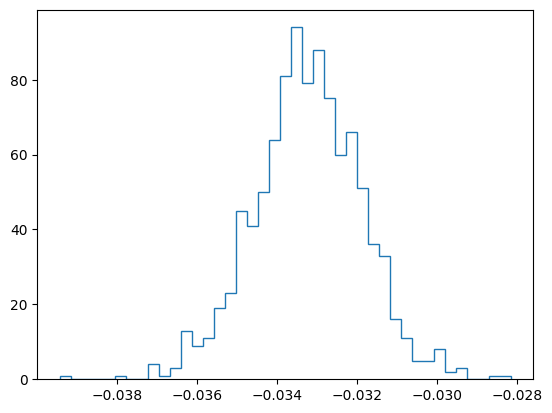

In [32]:
plt.hist(mboot, bins=41, histtype='step')

(array([  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,  10.98519817,  10.98519817,
          0.        ,   5.49259909,  10.98519817,  49.43339179,
         65.91118905, 175.7631708 , 258.15215711, 285.61515254,
        543.76730965, 543.76730965, 329.55594524, 252.65955802,
         93.37418449,  49.43339179,  32.95559452,  16.47779726,
          0.        ,   0.        ,   5.49259909,   0.        ,
          5.49259909,   0.        ,   0.        ]),
 array([-0.03943391, -0.03906979, -0.03870566, -0.03834153, -0.03797741,
        -0.03761328, -0.03724915, -0.03688503, -0.0365209 , -0.03615678,
        -0.03579265, -0.03542852, -0.0350644 , -0.03470027, -0.03433614,
        -0.03397202, -0.03360789, -0.03324376, -0.03287964, -0.03251551,
        -0.03215139, -0.03178726, -0.03142313, -0.03105901, -0.03069488,
        -0.03033075, -0.02996663, -0.0296025 , -0.02923837, -0.02887425,
        -0.02851012, -0.028146  ]),
 [<matplotlib.patches.Poly

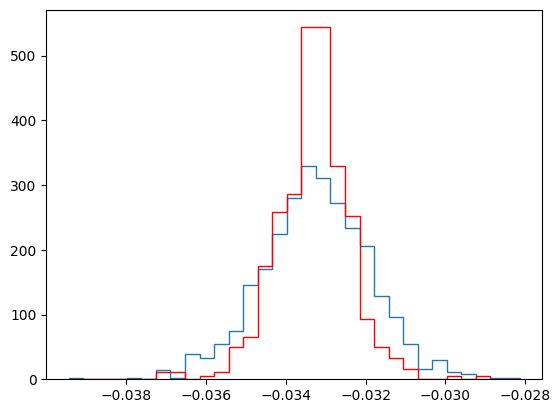

In [36]:
_, bins, _ = plt.hist(mboot, bins=31, histtype='step', density=True)
plt.hist(m_jack, bins=bins, histtype='step', color='r', density=True)

In [85]:
mboot.mean(),

np.float64(-0.033238860829961935)

In [37]:
mboot.std(),  m_jack.std()

(np.float64(0.0013497510983869186), np.float64(0.0009106064219242204))

In [38]:
-0.03 / 0.0013

-23.076923076923077

In [39]:
gp.shape

(1000, 1000, 2)

(array([ 10.,  23.,  67., 162., 257., 243., 152.,  61.,  23.,   2.]),
 array([0.01359248, 0.01480533, 0.01601818, 0.01723103, 0.01844388,
        0.01965673, 0.02086958, 0.02208243, 0.02329528, 0.02450813,
        0.02572098]),
 <BarContainer object of 10 artists>)

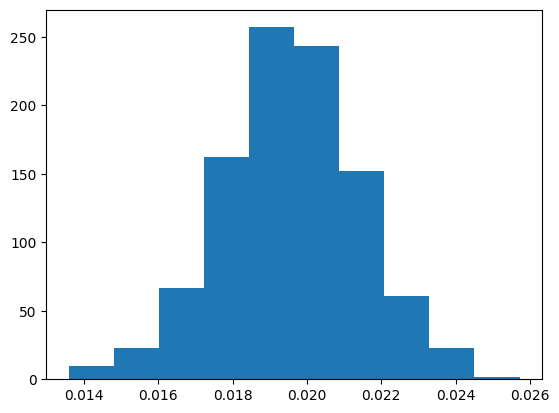

In [42]:
plt.hist(gp[:, :, 0].mean(axis=1))

In [45]:
gp[:, :, 0].mean(axis=1).mean(axis=0)

np.float64(0.01957877798770619)

In [44]:
gp[:, :, 0].mean(axis=1).std(axis=0)

np.float64(0.0018610109585787305)

(array([  1.,   1.,  24.,  78., 218., 348., 232.,  77.,  19.,   2.]),
 array([-0.03943391, -0.03830512, -0.03717633, -0.03604754, -0.03491875,
        -0.03378995, -0.03266116, -0.03153237, -0.03040358, -0.02927479,
        -0.028146  ]),
 <BarContainer object of 10 artists>)

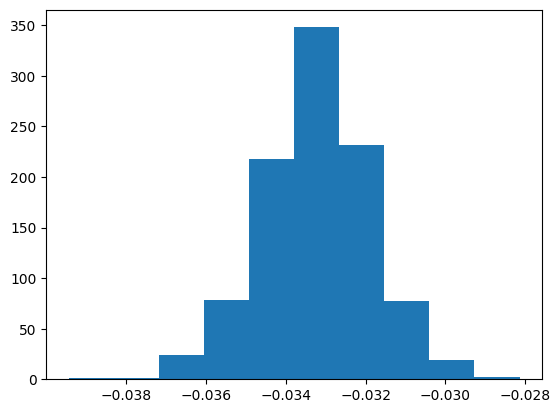

In [50]:
x = gp[:, :, 0].mean(axis=1) - gm[:, :, 0].mean(axis=1)
plt.hist(x / 2 / 0.02 - 1)

(array([  9.,  25.,  69., 136., 221., 236., 170.,  79.,  41.,  14.]),
 array([-0.02344756, -0.02238878, -0.02133   , -0.02027123, -0.01921245,
        -0.01815367, -0.0170949 , -0.01603612, -0.01497734, -0.01391857,
        -0.01285979]),
 <BarContainer object of 10 artists>)

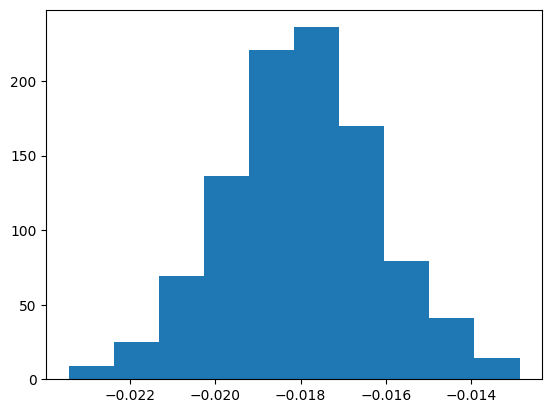

In [41]:
plt.hist(gm[0, :, 0])

In [130]:
stds = []
for ii in range(2, 1000):
    indices = np.random.choice(np.arange(1000), size=(ii,), replace=False)
    stds.append( np.sqrt( mboot[indices].var() * (ii-1) ) )
stds = np.array(stds)

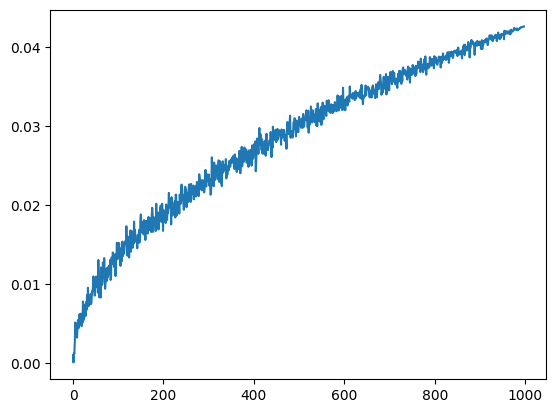

In [131]:
plt.plot(stds)
# plt.axhline(stds[-1], linestyle='--', color='k')

In [132]:
stds = []
for ii in range(2, 1000):
    indices = np.random.choice(np.arange(1000), size=(ii,), replace=False)
    m = mboot[indices]
    q1 = np.quantile(m, 0.025)
    q2 = np.quantile(m, 0.975)
    stds.append(q2 - q1)
stds = np.array(stds)

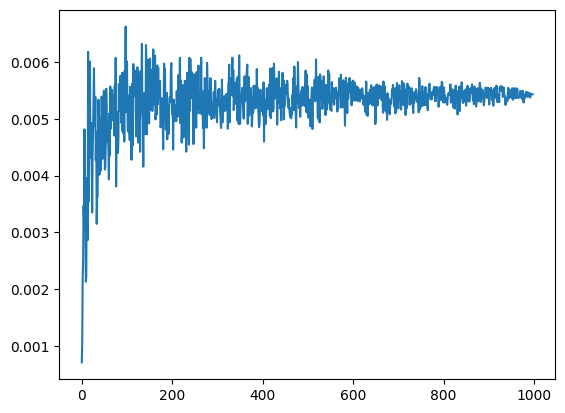

In [133]:
plt.plot(stds)


In [119]:
gp[...,0].mean(axis=1).shape

(1000,)

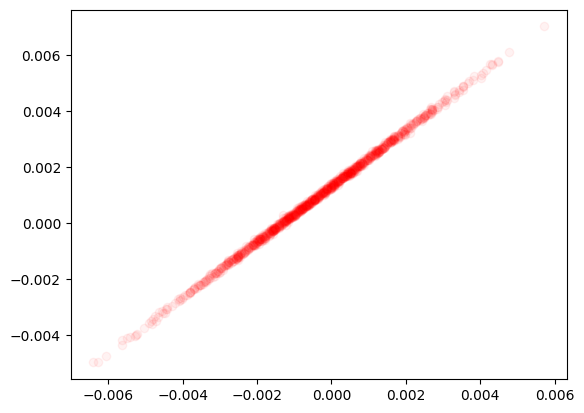

In [151]:
x = gp[...,0].mean(axis=1) - 0.02
y = gm[...,0].mean(axis=1) + 0.02 
plt.plot(x, y, 'o', color='r', alpha=0.05)

In [152]:
from scipy.stats import linregress, t

res = linregress(x, y)
m = res.slope
b = res.intercept
r = res.rvalue
m_err = res.stderr
b_err = res.intercept_stderr

In [153]:
m, b

(np.float64(0.9985574734077551), np.float64(0.001328946809244505))

In [154]:
m_est = b / (2 * 0.02)
m_est


np.float64(0.033223670231112626)

In [158]:
np.sqrt(((mboot - mboot.mean())**2).sum() * 1000 / (999))

np.float64(0.04270423491032206)

(array([ 10.,  23.,  67., 162., 257., 243., 152.,  61.,  23.,   2.]),
 array([0.01359248, 0.01480533, 0.01601818, 0.01723103, 0.01844388,
        0.01965673, 0.02086958, 0.02208243, 0.02329528, 0.02450813,
        0.02572098]),
 <BarContainer object of 10 artists>)

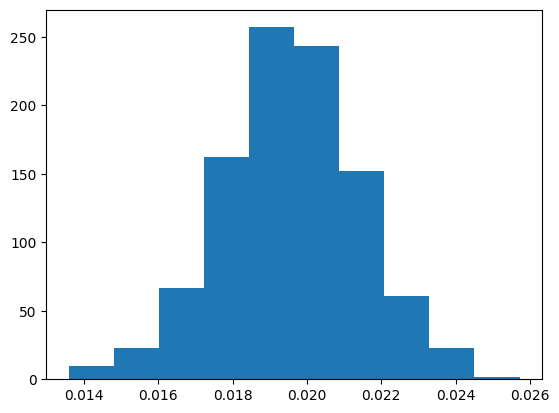

In [163]:
plt.hist(gp.mean(axis=1)[:, 0])

(array([ 10.,  24.,  67., 171., 253., 241., 150.,  61.,  21.,   2.]),
 array([-0.02498913, -0.02378665, -0.02258416, -0.02138168, -0.0201792 ,
        -0.01897671, -0.01777423, -0.01657174, -0.01536926, -0.01416678,
        -0.01296429]),
 <BarContainer object of 10 artists>)

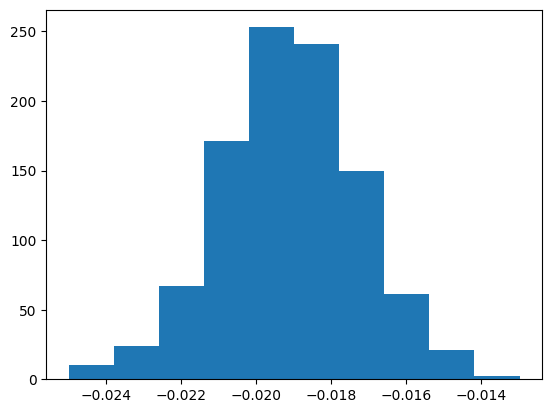

In [162]:
plt.hist(gm.mean(axis=1)[:, 0])

In [176]:
stds = []
for ii in range(2, 1000):
    indices = np.random.choice(np.arange(1000), size=(ii,), replace=False)
    stds.append( np.sqrt( mboot[indices].var() ) )
stds = np.array(stds)

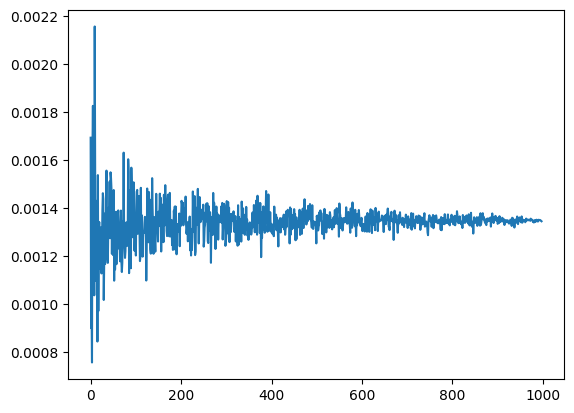

In [177]:
plt.plot(stds)

In [186]:
mboot.shape, m_jack.shape

((1000,), (200,))

In [189]:
mboot.std(), m_jack.std()

(np.float64(0.0013497510983869186), np.float64(0.0010246780883726282))

# Bootstraps 

In [3]:
from bpd.io import load_dataset
import numpy as np
import matplotlib.pyplot as plt 

In [4]:
fpath = "/pscratch/sd/i/imendoza/data/cache_chains/exp70_44/g_samples_boots_443.npz"

In [5]:
ds = load_dataset(fpath)

In [6]:
ds.keys()

dict_keys(['gp', 'gm'])

In [7]:
gp = ds['gp']
gm = ds['gm']

In [8]:
gp.shape, gm.shape

((502, 1000, 2), (502, 1000, 2))

In [9]:
g1 = 0.02

In [10]:
mboot = (
    gp[..., 0].mean(axis=1) - gm[..., 0].mean(axis=1)
) / 2 / g1 - 1

(array([  5.,  18.,  53.,  60., 105., 119.,  73.,  50.,  17.,   2.]),
 array([0.01654893, 0.0169963 , 0.01744368, 0.01789105, 0.01833843,
        0.0187858 , 0.01923318, 0.01968055, 0.02012793, 0.0205753 ,
        0.02102268]),
 <BarContainer object of 10 artists>)

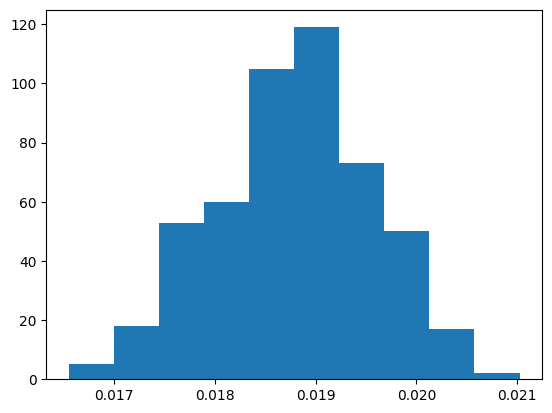

In [11]:
plt.hist(gp[..., 0].mean(axis=1))

(array([  6.,  17.,  53.,  61., 104., 123.,  71.,  50.,  14.,   3.]),
 array([-0.02341754, -0.02296876, -0.02251998, -0.0220712 , -0.02162242,
        -0.02117364, -0.02072486, -0.02027609, -0.01982731, -0.01937853,
        -0.01892975]),
 <BarContainer object of 10 artists>)

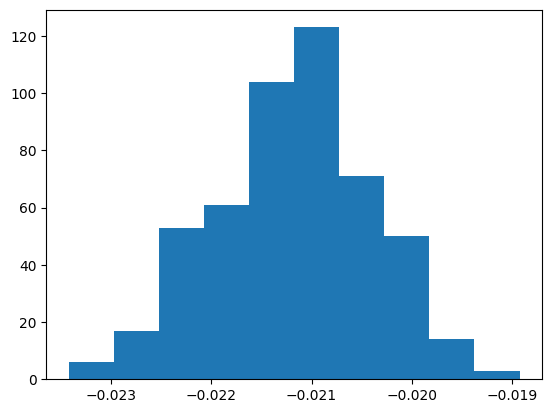

In [12]:
plt.hist(gm[..., 0].mean(axis=1))

(array([  1.,   8.,  27.,  52.,  97., 126., 110.,  55.,  22.,   4.]),
 array([-2.67272488e-03, -2.32857761e-03, -1.98443034e-03, -1.64028307e-03,
        -1.29613580e-03, -9.51988525e-04, -6.07841254e-04, -2.63693984e-04,
         8.04532870e-05,  4.24600558e-04,  7.68747828e-04]),
 [<matplotlib.patches.Polygon at 0x7f18311e5310>])

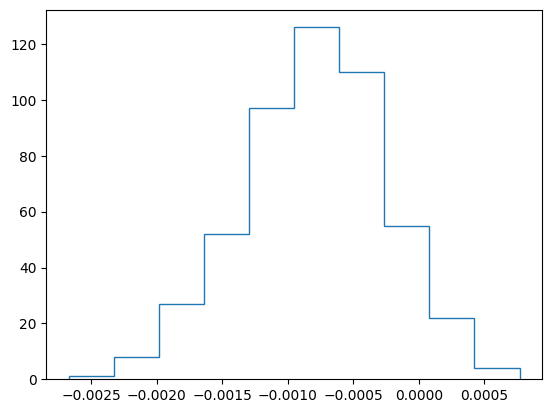

In [13]:
plt.hist(mboot, histtype='step')

In [14]:
mboot.mean(), mboot.std()

(np.float64(-0.0007921456665302314), np.float64(0.0005467096279008515))

In [15]:
mboot.mean() / 1e-3, mboot.std() / 1e-3

(np.float64(-0.7921456665302313), np.float64(0.5467096279008514))

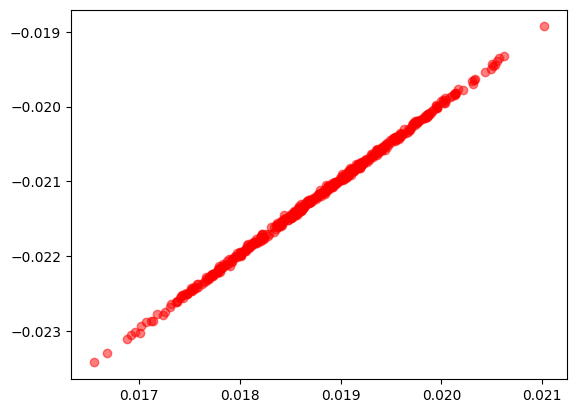

In [16]:
x = gp[...,0].mean(axis=1) 
y = gm[...,0].mean(axis=1) 
plt.plot(x, y, 'o', color='r', alpha=0.5)

# Alternative method of estimating error

In [1]:
from bpd.io import load_dataset
import numpy as np

In [2]:
fpath = "/pscratch/sd/i/imendoza/data/cache_chains/exp70_44/g_samples_449_errs.npz"

In [3]:
ds = load_dataset(fpath)

In [4]:
ds.keys()

dict_keys(['g_plus', 'g_minus', 'sigma_e', 'sigma_e_int'])

In [5]:
gp = ds['g_plus']
gm = ds['g_minus']

In [6]:
gp.shape

(500, 1000, 2)

In [7]:
m = (gp[:, :, 0].mean(axis=1) - gm[:, :, 0].mean(axis=1)) / 2 / 0.02 -1

In [8]:
m.std() / np.sqrt(500) / 1e-3 

np.float64(0.5916506369607623)

In [9]:
m.mean() / 1e-3 

np.float64(-1.893035074973603)